In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

excel_path = "Data set.xlsx"
sheet_names = ["Transient IC1(2)"]
data = {sheet_name: pd.read_excel(excel_path, sheet_name=sheet_name) for sheet_name in sheet_names}

inputs = data["Transient IC1(2)"]

input_names = ['TL1 Length (mm)', 'TL2 Length (mm)', 'R1 (Ohm)', 'TL1 Impedance (Ohm)', 'TL2 Impedance (Ohm)']
output_names = ['Maximum (V)', 'Minimum (V)', 'Overshoot 1st Rising (V)', 'Rise Time 20/80 (ns)', 'Fall Time 20/80 (ns)']

X = inputs.iloc[:, 1:7].values.astype(np.float32)
y_ic1_2 = inputs.iloc[:, 7:12].values.astype(np.float32)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_ic1_2_scaled = scaler_y.fit_transform(y_ic1_2)

model_ic1_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,), name='input_layer'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer1'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer2'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer3'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer4'),
    keras.layers.Dense(5, name='output_layer_ic1_2')
], name='FFN_model_ic1_2')

model_ic1_2.compile(optimizer='adam', loss='mse')

X_train_ic1_2, X_test_ic1_2, y_ic1_2_train, y_ic1_2_test = train_test_split(X_scaled, y_ic1_2_scaled, test_size=0.2, random_state=42)

history_ic1_2 = model_ic1_2.fit(X_train_ic1_2, y_ic1_2_train, epochs=200, validation_data=(X_test_ic1_2, y_ic1_2_test))

loss_ic1_2 = model_ic1_2.evaluate(X_test_ic1_2, y_ic1_2_test)
print("IC1(2) Test Loss:", loss_ic1_2)

mse = mean_squared_error(y_ic1_2_test, model_ic1_2.predict(X_test_ic1_2))
print('Mean Squared Error (MSE):', mse)

mae = mean_absolute_error(y_ic1_2_test, model_ic1_2.predict(X_test_ic1_2))
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(y_ic1_2_test, model_ic1_2.predict(X_test_ic1_2))
print('R-squared (R2) Score:', r2)

predictions_ic1_2 = scaler_y.inverse_transform(predictions_ic1_2_scaled)

model_ic1_2.save("model_ic1_2.h5")


Epoch 1/200
15/15 [==============================] - 2s 23ms/step - loss: 0.8885 - val_loss: 0.6629
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6146 - val_loss: 0.5493
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5099 - val_loss: 0.4650
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4360 - val_loss: 0.4006
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3608 - val_loss: 0.3478
Epoch 6/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3174 - val_loss: 0.3282
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2865 - val_loss: 0.2751
Epoch 8/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2495 - val_loss: 0.2453
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2184 - val_loss: 0.2097
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1919 - val_loss: 0.1941
Epoch 11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 3ms/step


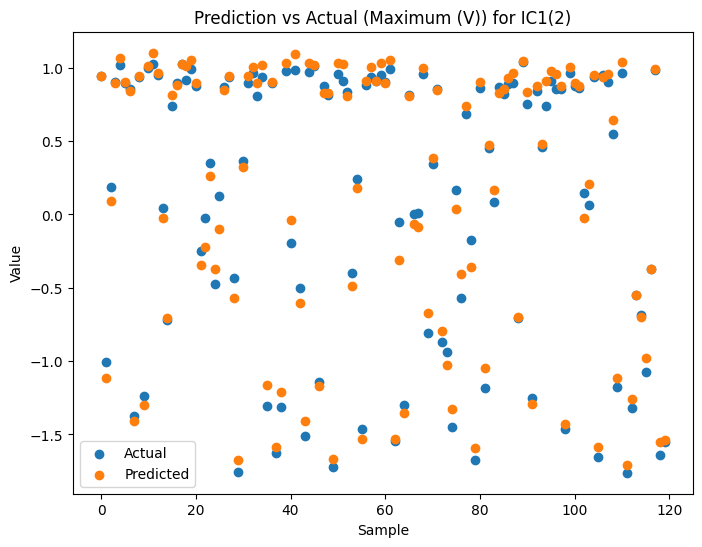

4/4 [==============================] - 0s 3ms/step


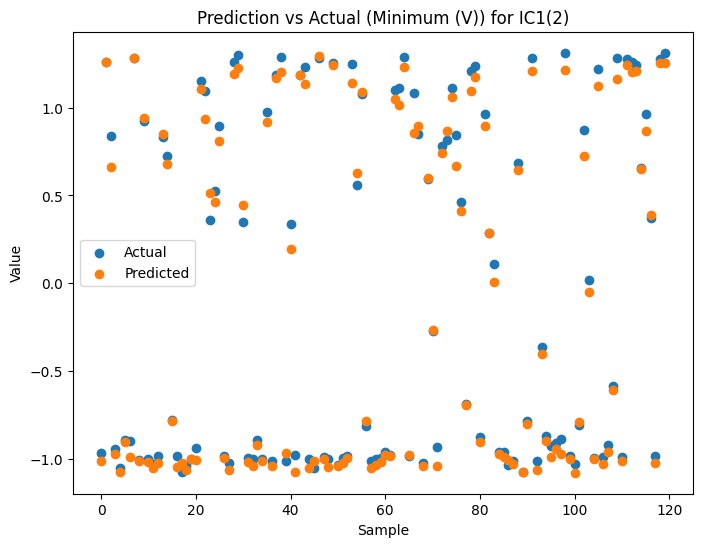

4/4 [==============================] - 0s 3ms/step


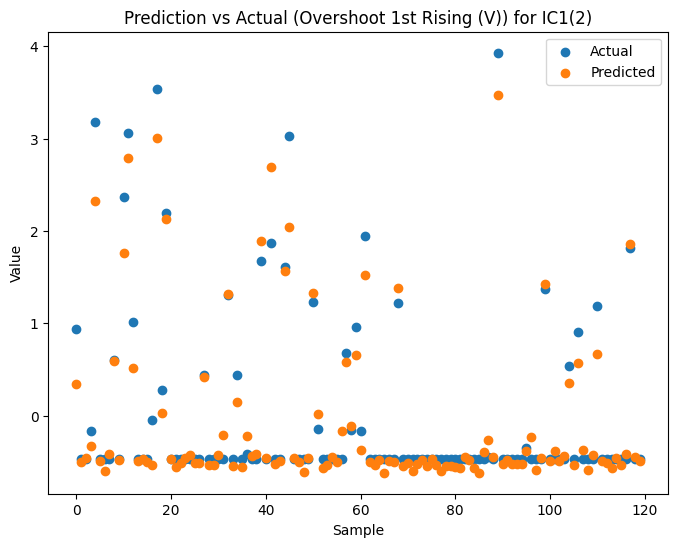

4/4 [==============================] - 0s 3ms/step


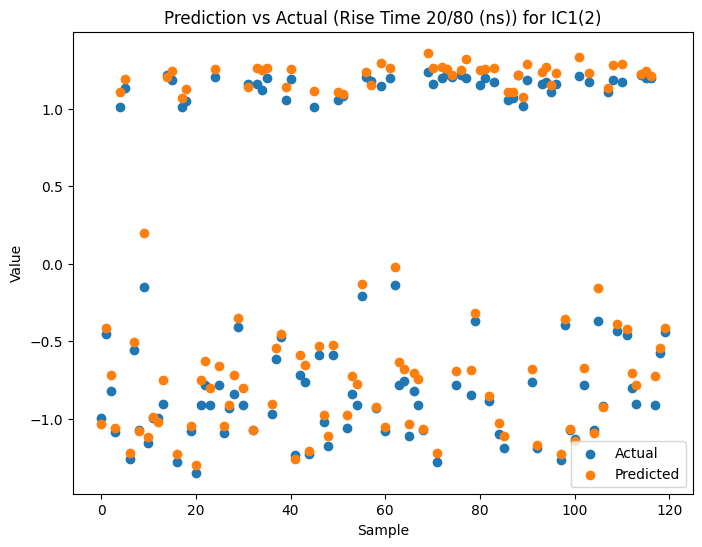

4/4 [==============================] - 0s 5ms/step


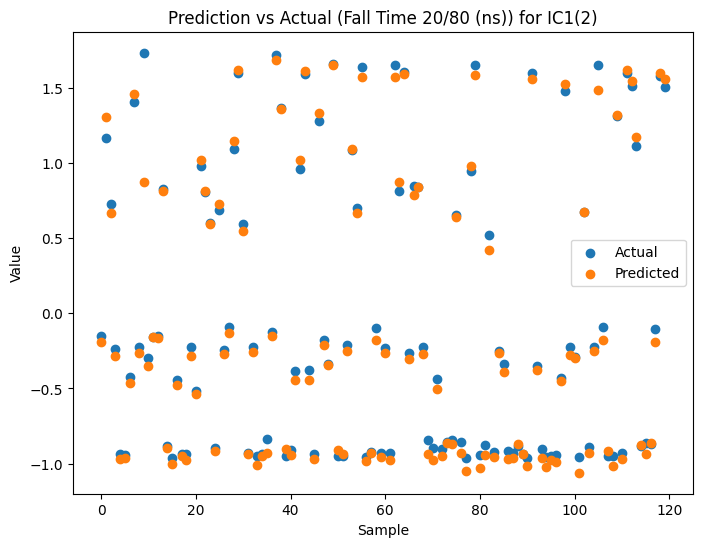

In [ ]:
for i, output_name in enumerate(output_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_ic1_2_test)), y_ic1_2_test[:, i], label='Actual')
    plt.scatter(range(len(y_ic1_2_test)), model_ic1_2.predict(X_test_ic1_2)[:, i], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(f'Prediction vs Actual ({output_name}) for IC1(2)')
    plt.legend()
    plt.show()

In [ ]:
new_inputs = np.array([[50, 50, 50, 100, 103.544, 108]], dtype=np.float32)
new_inputs_scaled = scaler_X.transform(new_inputs)
predictions_ic1_2_new = model_ic1_2.predict(new_inputs_scaled)

predictions_ic1_2_new = scaler_y.inverse_transform(predictions_ic1_2_new)

print("Predictions for new inputs (IC1(2)):")
for i, output_name in enumerate(output_names):
    print(f"{output_name}: {predictions_ic1_2_new[0][i]:.3f}")

1/1 [==============================] - 0s 21ms/step
Predictions for new inputs (IC1(2)):
Maximum (V): 2.617
Minimum (V): 0.133
Overshoot 1st Rising (V): 0.004
Rise Time 20/80 (ns): 1.362
Fall Time 20/80 (ns): 1.130
